In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import re
import pickle
import warnings
warnings.filterwarnings("ignore")

C:\Users\91880\AppData\Local\Temp\ipykernel_25176\1127611964.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# reading separate excel file for bangalore, chennai, delhi, hyderabad, jaipur, kolkata
df1 = pd.read_excel("bangalore_cars.xlsx")
df1["Location"] = "Bangalore"

In [3]:
df2 = pd.read_excel("chennai_cars.xlsx")
df2["Location"] = "Chennai"

In [4]:
df3 = pd.read_excel("delhi_cars.xlsx")
df3["Location"] = "Delhi"

In [5]:
df4 = pd.read_excel("hyderabad_cars.xlsx")
df4["Location"] = "Hyderabad"

In [6]:
df5 = pd.read_excel("jaipur_cars.xlsx")
df5["Location"] = "Jaipur"

In [7]:
df6 = pd.read_excel("kolkata_cars.xlsx")
df6["Location"] = "Kolkata"

In [8]:
# concatenating the dataframe altogether
df = pd.concat([df1, df2, df3, df4, df5, df6], axis = 0, ignore_index = True)
# top five rows
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [9]:
# bottom five rows
df.tail()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Location
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata
8368,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Kolkata


In [10]:
# the dataset contains 8369 rows and 6 columns
df.shape

(8369, 6)

by seeing the data, all the values in each column is in a dictionary format. so ,lets explore each column one by one below

In [11]:
df["new_car_detail"].unique()

array(["{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}",
       "{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '32,706', 'transmission': 'Manual', 'ownerNo': 2, 'owner': '2nd Owner', 'oem': 'Ford', 'model': 'Ford Ecosport', 'modelYear': 2018, 'centralVariantId': 6087, 'variantName': '1.5 Petrol Titanium BSIV', 'price': '₹ 8.11 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 d

In [12]:
df["new_car_overview"].unique()

array(["{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA51', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmiss

In [13]:
df["new_car_feature"].unique()

array(["{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Manually Adjustable Exterior Rear View Mirror'}, {'value': 'Centeral Locking'}, {'value': 'Child Safety Locks'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Remote Trunk Opener'}, {'value': 'Remote Fuel Lid Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Cup Holders Front'}]}, {'heading': 'Interior', 'subHeading': 'Interior', 'list': [{'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Digital Odometer'}, {'value': 'Electronic Multi Tripmeter'}, {'value': 'Fabric Upholstery'}, {'value': 'Glove Compartment'}, {'value': 'Digital Clo

In [14]:
df["new_car_specs"].unique()

array(["{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'valu

In [15]:
df["Location"].unique()

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata'],
      dtype=object)

In [16]:
# data type for each feature
df.dtypes

new_car_detail      object
new_car_overview    object
new_car_feature     object
new_car_specs       object
car_links           object
Location            object
dtype: object

## new_car detail feature

In [17]:
# by iterating through each row in new_car_detail feature, and using json.loads to load the dictionary type values and appending their values to their respective keys.

data_car_detail = {'it': [], 'ft': [], 'bt': [], 'km': [], 'transmission': [], 'ownerNo': [], 'owner': [], 'oem': [], 'model': [], 'modelYear': [], 'centralVariantId': [], 
                   'variantName': [], 'price': [], 'priceActual': [], 'priceSaving': [], 'priceFixedText': []}

for i in df["new_car_detail"]:
    a = json.loads(i.replace("'",'"' ).replace("None","0"))
    data_car_detail["ft"].append(a["ft"])
    data_car_detail["it"].append(a["it"])
    data_car_detail["bt"].append(a["bt"])
    data_car_detail["km"].append(a["km"])
    data_car_detail["transmission"].append(a["transmission"])
    data_car_detail["ownerNo"].append(a["ownerNo"])
    data_car_detail["owner"].append(a["owner"])
    data_car_detail["oem"].append(a["oem"])
    data_car_detail["model"].append(a["model"])
    data_car_detail["modelYear"].append(a["modelYear"])
    data_car_detail["centralVariantId"].append(a["centralVariantId"])
    data_car_detail["variantName"].append(a["variantName"])
    data_car_detail["price"].append(a["price"])
    data_car_detail["priceActual"].append(a["priceActual"])
    data_car_detail["priceSaving"].append(a["priceSaving"])
    data_car_detail["priceFixedText"].append(a["priceFixedText"])  

In [18]:
# converting it in to dataframe
df_car_detail = pd.DataFrame(data_car_detail)
df_car_detail

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,0
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,0
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,0
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,0
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,0
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,0
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,0
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,,0


## new_car_overview feature

In [19]:
# getting unique keys in new_car_overview feature
key = []
for i in df["new_car_overview"]:
    b = json.loads(i.replace("'", '"').replace("None", "0"))
    for j in b["top"]:
            key.append(j["key"])

set(key)

{'Engine Displacement',
 'Fuel Type',
 'Insurance Validity',
 'Kms Driven',
 'Ownership',
 'RTO',
 'Registration Year',
 'Seats',
 'Transmission',
 'Year of Manufacture'}

In [20]:
data_car_overview = {'Engine Displacement': [], 'Fuel Type': [], 'Insurance Validity': [], 'Kms Driven': [], 'Ownership': [], 'RTO': [], 'Registration Year': [],
                     'Seats': [], 'Transmission': [], 'Year of Manufacture': []}

for i in df["new_car_overview"]:
    b = json.loads(i.replace("'", '"').replace("None", "0"))
    col = ['Engine Displacement', 'Fuel Type', 'Insurance Validity', 'Kms Driven', 'Ownership', 'RTO', 'Registration Year', 'Seats', 'Transmission', 'Year of Manufacture']
    for j in b["top"]:
        data_car_overview[j["key"]].append(j["value"])
        col.remove(j["key"])
    for k in col:
        data_car_overview[k].append(np.nan)       
    

In [21]:
df_car_overview = pd.DataFrame(data_car_overview)
df_car_overview

,Engine Displacement,Fuel Type,Insurance Validity,Kms Driven,Ownership,RTO,Registration Year,Seats,Transmission,Year of Manufacture
0,998 cc,Petrol,Third Party insurance,"1,20,000 Kms",Third Owner,KA51,2015,5 Seats,Manual,2015.0
1,1497 cc,Petrol,Comprehensive,"32,706 Kms",Second Owner,KA05,Feb 2018,5 Seats,Manual,2018.0
2,1199 cc,Petrol,Comprehensive,"11,949 Kms",First Owner,KA03,Sept 2018,5 Seats,Manual,2018.0
3,1197 cc,Petrol,Comprehensive,"17,794 Kms",First Owner,KA53,Dec 2014,5 Seats,Manual,2014.0
4,1248 cc,Diesel,Third Party insurance,"60,000 Kms",First Owner,KA04,2015,5 Seats,Manual,2015.0
...,...,...,...,...,...,...,...,...,...,...
8364,998 cc,Petrol,Third Party insurance,"10,000 Kms",First Owner,NaN,2022,5 Seats,Manual,2022.0
8365,796 cc,Petrol,Third Party insurance,"1,20,000 Kms",First Owner,NaN,2014,5 Seats,Manual,2014.0
8366,1796 cc,Petrol,Third Party insurance,"50,000 Kms",Third Owner,WB06,2011,5 Seats,Automatic,2011.0
8367,1197 cc,Petrol,Third Party insurance,"40,000 Kms",First Owner,NaN,2012,5 Seats,Manual,2012.0


# new_car_specs feature

In [22]:
df["new_car_specs"].values

array(["{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'valu

In [23]:
key = []
for i in df["new_car_specs"]:
    c = json.loads(i.replace("'", '"'))
    for j in c["top"]:
        key.append(j["key"])

set(key)


{'Engine', 'Max Power', 'Mileage', 'Seats', 'Torque', 'Wheel Size'}

In [24]:
data_car_specs_1 = {'Wheel Size': [], 'Seats': [], 'Mileage': [], 'Torque': [], 'Engine': [], 'Max Power': []}

for i in df["new_car_specs"]:
    c = json.loads(i.replace("'", '"'))
    col = ['Wheel Size', 'Seats', 'Mileage', 'Torque', 'Engine', 'Max Power']
    for j in c["top"]:
        data_car_specs_1[j["key"]].append(j["value"])
        col.remove(j["key"])
    for k in col:
        data_car_specs_1[k].append(np.nan)


In [25]:
df_car_specs_1 = pd.DataFrame(data_car_specs_1)
df_car_specs_1

,Wheel Size,Seats,Mileage,Torque,Engine,Max Power
0,NaN,5,23.1 kmpl,90Nm,998 CC,67.04bhp
1,16,5,17 kmpl,150Nm,1497 CC,121.31bhp
2,14,5,23.84 kmpl,114Nm,1199 CC,84bhp
3,14,5,19.1 kmpl,113.75Nm,1197 CC,81.86bhp
4,16,5,23.65 kmpl,200Nm,1248 CC,88.5bhp
...,...,...,...,...,...,...
8364,NaN,5,25.24 kmpl,89Nm,998 CC,65.71bhp
8365,NaN,5,22.74 kmpl,69Nm,796 CC,47.3bhp
8366,17,5,11.74 kmpl,285Nm,1796 CC,186bhp
8367,14,5,18.5 kmpl,114Nm,1197 CC,85.80bhp


In [26]:
key = []
for i in df["new_car_specs"]:
    # print(i)
    c = json.loads(i.replace("'", '"'))
    for j in c["data"][0]["list"]:
        key.append(j["key"])
        
set(key)

{'Alloy Wheel Size',
 'BoreX Stroke',
 'Color',
 'Compression Ratio',
 'Displacement',
 'Engine Type',
 'Fuel Suppy System',
 'Max Power',
 'Max Torque',
 'No Door Numbers',
 'No of Cylinder',
 'Seating Capacity',
 'Steering Type',
 'Super Charger',
 'Turbo Charger',
 'Tyre Type',
 'Value Configuration',
 'Values per Cylinder'}

In [27]:
data_car_specs_2 = {'Turbo Charger': [], 'No of Cylinder': [], 'Tyre Type': [], 'Displacement': [], 'BoreX Stroke': [], 'Steering Type': [], 'Color': [], 'No Door Numbers': [],
                   'Alloy Wheel Size': [], 'Compression Ratio': [], 'Fuel Suppy System': [], 'Super Charger': [], 'Seating Capacity': [], 'Values per Cylinder': [], 
                   'Max Torque': [], 'Value Configuration': [], 'Engine Type' : [], 'Max Power': []}

for i in df["new_car_specs"]:
    c = json.loads(i.replace("'", '"'))
    col = ['Turbo Charger', 'No of Cylinder', 'Tyre Type', 'Displacement', 'BoreX Stroke', 'Steering Type', 'Color', 'No Door Numbers', 'Alloy Wheel Size', 'Compression Ratio', 
           'Fuel Suppy System', 'Super Charger', 'Seating Capacity', 'Values per Cylinder', 'Max Torque', 'Value Configuration', 'Engine Type', 'Max Power']
    
    for j in c["data"][0]["list"]:
        data_car_specs_2[j["key"]].append(j["value"])
        col.remove(j["key"])
        
    for k in col:
        data_car_specs_2[k].append(np.nan)


In [28]:
df_car_specs_2 = pd.DataFrame(data_car_specs_2)
df_car_specs_2

,Turbo Charger,No of Cylinder,Tyre Type,Displacement,BoreX Stroke,Steering Type,Color,No Door Numbers,Alloy Wheel Size,Compression Ratio,Fuel Suppy System,Super Charger,Seating Capacity,Values per Cylinder,Max Torque,Value Configuration,Engine Type,Max Power
0,No,3.0,NaN,998,73 X 82 mm,NaN,White,NaN,NaN,11.0:1,MPFi,No,NaN,4.0,90Nm@3500rpm,DOHC,K10B Engine,67.04bhp@6000rpm
1,No,3.0,NaN,1497,79 X 76.5 mm,NaN,White,NaN,NaN,11.0:1,Direct Injection,No,NaN,4.0,150Nm@4500rpm,DOHC,Ti-VCT Petrol Engine,121.31bhp@6500rpm
2,No,3.0,NaN,1199,77 X 85.8 mm,NaN,Red,NaN,NaN,10.8:1,MPFi,No,NaN,4.0,114Nm@3500rpm,DOHC,Revotron Engine,84bhp@6000rpm
3,No,4.0,NaN,1197,NaN,NaN,Others,NaN,NaN,NaN,Direct Injection,No,NaN,4.0,113.75Nm@4000rpm,DOHC,Kappa VTVT Petrol Engine,81.86bhp@6000rpm
4,Yes,4.0,NaN,1248,69.6 x 82 mm,NaN,Gray,NaN,NaN,NaN,NaN,No,NaN,4.0,200Nm@1750rpm,DOHC,DDiS 200 Diesel Engine,88.5bhp@4000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,NaN,3.0,NaN,998,NaN,NaN,Others,NaN,NaN,NaN,NaN,NaN,NaN,4.0,89Nm@3500rpm,NaN,K10C,65.71bhp@5500rpm
8365,No,3.0,NaN,796,NaN,NaN,Others,NaN,NaN,NaN,MPFi,No,NaN,4.0,69Nm@3500rpm,DOHC,F8D Petrol Engine,47.3bhp@6000rpm
8366,No,4.0,NaN,1796,NaN,NaN,Others,NaN,NaN,9.3:1,Mpfi,No,NaN,4.0,285Nm@2400-4000rpm,NaN,Blue Efficiency Engine,186bhp@5600rpm
8367,No,4.0,NaN,1197,NaN,NaN,Others,NaN,NaN,NaN,MPFI,No,NaN,4.0,114Nm@4000rpm,DOHC,K Series Petrol Engine,85.80bhp@6000rpm


In [29]:
# concatenating all the dataframe in to a single one
total_df = pd.concat([df["Location"], df_car_detail, df_car_overview, df_car_specs_1, df_car_specs_2], axis = 1)
total_df

,Location,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Alloy Wheel Size,Compression Ratio,Fuel Suppy System,Super Charger,Seating Capacity,Values per Cylinder,Max Torque,Value Configuration,Engine Type,Max Power
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,NaN,11.0:1,MPFi,No,NaN,4.0,90Nm@3500rpm,DOHC,K10B Engine,67.04bhp@6000rpm
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,NaN,11.0:1,Direct Injection,No,NaN,4.0,150Nm@4500rpm,DOHC,Ti-VCT Petrol Engine,121.31bhp@6500rpm
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,NaN,10.8:1,MPFi,No,NaN,4.0,114Nm@3500rpm,DOHC,Revotron Engine,84bhp@6000rpm
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,NaN,NaN,Direct Injection,No,NaN,4.0,113.75Nm@4000rpm,DOHC,Kappa VTVT Petrol Engine,81.86bhp@6000rpm
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,NaN,NaN,NaN,No,NaN,4.0,200Nm@1750rpm,DOHC,DDiS 200 Diesel Engine,88.5bhp@4000rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,NaN,NaN,NaN,NaN,NaN,4.0,89Nm@3500rpm,NaN,K10C,65.71bhp@5500rpm
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,NaN,NaN,MPFi,No,NaN,4.0,69Nm@3500rpm,DOHC,F8D Petrol Engine,47.3bhp@6000rpm
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,NaN,9.3:1,Mpfi,No,NaN,4.0,285Nm@2400-4000rpm,NaN,Blue Efficiency Engine,186bhp@5600rpm
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,NaN,NaN,MPFI,No,NaN,4.0,114Nm@4000rpm,DOHC,K Series Petrol Engine,85.80bhp@6000rpm


In [30]:
# now, the shape of the data is 8369 rows and 51 columns
total_df.shape

(8369, 51)

In [31]:
# features/columns
total_df.columns

Index(['Location', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'Engine Displacement',
       'Fuel Type', 'Insurance Validity', 'Kms Driven', 'Ownership', 'RTO',
       'Registration Year', 'Seats', 'Transmission', 'Year of Manufacture',
       'Wheel Size', 'Seats', 'Mileage', 'Torque', 'Engine', 'Max Power',
       'Turbo Charger', 'No of Cylinder', 'Tyre Type', 'Displacement',
       'BoreX Stroke', 'Steering Type', 'Color', 'No Door Numbers',
       'Alloy Wheel Size', 'Compression Ratio', 'Fuel Suppy System',
       'Super Charger', 'Seating Capacity', 'Values per Cylinder',
       'Max Torque', 'Value Configuration', 'Engine Type', 'Max Power'],
      dtype='object')

In [32]:
# calculating missing values percentage to drop the columns that contains higher percentage of missing values 
total_df.isnull().sum()/total_df.shape[0]*100

Location                0.000000
it                      0.000000
ft                      0.000000
bt                      0.000000
km                      0.000000
transmission            0.000000
ownerNo                 0.000000
owner                   0.000000
oem                     0.000000
model                   0.000000
modelYear               0.000000
centralVariantId        0.000000
variantName             0.000000
price                   0.000000
priceActual             0.000000
priceSaving             0.000000
priceFixedText          0.000000
Engine Displacement     0.047795
Fuel Type               0.000000
Insurance Validity      0.047795
Kms Driven              0.023898
Ownership               0.382363
RTO                    10.610587
Registration Year       0.621341
Seats                   0.071693
Transmission            0.000000
Year of Manufacture     0.238977
Wheel Size             35.643446
Seats                   0.059744
Mileage                 3.429322
Torque    

In [33]:
# we are retaining those columns which has less than five percentage of missing values
new_df = total_df.loc[:, total_df.isnull().sum()/total_df.shape[0]*100 < 5] 
# top 20 columns
new_df.iloc[:, 0:20]

,Location,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,Engine Displacement,Fuel Type,Insurance Validity
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,0,998 cc,Petrol,Third Party insurance
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,0,1497 cc,Petrol,Comprehensive
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,0,1199 cc,Petrol,Comprehensive
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,0,1197 cc,Petrol,Comprehensive
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,0,1248 cc,Diesel,Third Party insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,0,998 cc,Petrol,Third Party insurance
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,0,796 cc,Petrol,Third Party insurance
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,0,1796 cc,Petrol,Third Party insurance
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,,0,1197 cc,Petrol,Third Party insurance


In [34]:
# last columns
new_df.iloc[:, 20:37]

,Kms Driven,Ownership,Registration Year,Seats,Transmission,Year of Manufacture,Seats,Mileage,Torque,Engine,Max Power,No of Cylinder,Displacement,Color,Values per Cylinder,Max Torque,Engine Type
0,"1,20,000 Kms",Third Owner,2015,5 Seats,Manual,2015.0,5,23.1 kmpl,90Nm,998 CC,67.04bhp,3.0,998,White,4.0,90Nm@3500rpm,K10B Engine
1,"32,706 Kms",Second Owner,Feb 2018,5 Seats,Manual,2018.0,5,17 kmpl,150Nm,1497 CC,121.31bhp,3.0,1497,White,4.0,150Nm@4500rpm,Ti-VCT Petrol Engine
2,"11,949 Kms",First Owner,Sept 2018,5 Seats,Manual,2018.0,5,23.84 kmpl,114Nm,1199 CC,84bhp,3.0,1199,Red,4.0,114Nm@3500rpm,Revotron Engine
3,"17,794 Kms",First Owner,Dec 2014,5 Seats,Manual,2014.0,5,19.1 kmpl,113.75Nm,1197 CC,81.86bhp,4.0,1197,Others,4.0,113.75Nm@4000rpm,Kappa VTVT Petrol Engine
4,"60,000 Kms",First Owner,2015,5 Seats,Manual,2015.0,5,23.65 kmpl,200Nm,1248 CC,88.5bhp,4.0,1248,Gray,4.0,200Nm@1750rpm,DDiS 200 Diesel Engine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"10,000 Kms",First Owner,2022,5 Seats,Manual,2022.0,5,25.24 kmpl,89Nm,998 CC,65.71bhp,3.0,998,Others,4.0,89Nm@3500rpm,K10C
8365,"1,20,000 Kms",First Owner,2014,5 Seats,Manual,2014.0,5,22.74 kmpl,69Nm,796 CC,47.3bhp,3.0,796,Others,4.0,69Nm@3500rpm,F8D Petrol Engine
8366,"50,000 Kms",Third Owner,2011,5 Seats,Automatic,2011.0,5,11.74 kmpl,285Nm,1796 CC,186bhp,4.0,1796,Others,4.0,285Nm@2400-4000rpm,Blue Efficiency Engine
8367,"40,000 Kms",First Owner,2012,5 Seats,Manual,2012.0,5,18.5 kmpl,114Nm,1197 CC,85.80bhp,4.0,1197,Others,4.0,114Nm@4000rpm,K Series Petrol Engine


so there are more no of columns that has same set of meaningful values. so we are gonna select unique columns

In [35]:
# the below features are dropped

# features - it, ft, kms driven, transmission, owner, Ownership, Registration Year, Year of Manufacture, centralVariantId, variantName, priceActual, 
#            priceSaving, priceFixedText, Engine Displacement, Engine
 

In [36]:
# features that are selected
new_df = new_df[["Location", "Fuel Type", "bt", "km", "Transmission", "ownerNo", "oem", "model", "modelYear", "Displacement", "Insurance Validity", "Seats", 
                 "Mileage", "No of Cylinder", "Color", "Values per Cylinder", "Engine Type", "Torque", "Max Power", "price" ]]

In [37]:
new_df.shape

(8369, 22)

In [38]:
new_df.nunique()

Location                  6
Fuel Type                 5
bt                       11
km                     4090
Transmission              2
ownerNo                   6
oem                      33
model                   315
modelYear                29
Displacement            150
Insurance Validity        7
Seats                     8
Seats                     9
Mileage                 522
No of Cylinder            8
Color                   153
Values per Cylinder       5
Engine Type             508
Torque                  366
Max Power               530
Max Power               760
price                  1400
dtype: int64

In [39]:
new_df.columns

Index(['Location', 'Fuel Type', 'bt', 'km', 'Transmission', 'ownerNo', 'oem',
       'model', 'modelYear', 'Displacement', 'Insurance Validity', 'Seats',
       'Seats', 'Mileage', 'No of Cylinder', 'Color', 'Values per Cylinder',
       'Engine Type', 'Torque', 'Max Power', 'Max Power', 'price'],
      dtype='object')

by looking at the column names above, there seems to be two columns having same columns names. so, we are dropping one of them in the below steps.

In [40]:
seats = new_df["Seats"].iloc[:, 1:2]
seats

,Seats
0,5
1,5
2,5
3,5
4,5
...,...
8364,5
8365,5
8366,5
8367,5


In [41]:
power = new_df["Max Power"].iloc[:, 0:1]
power

,Max Power
0,67.04bhp
1,121.31bhp
2,84bhp
3,81.86bhp
4,88.5bhp
...,...
8364,65.71bhp
8365,47.3bhp
8366,186bhp
8367,85.80bhp


In [42]:
new_df = new_df.drop(columns = ["Seats", "Max Power"], axis = 1)

In [43]:
new_df["Seats"] = seats
new_df["Power"] = power

In [44]:
# after doing the above steps
new_df.columns

Index(['Location', 'Fuel Type', 'bt', 'km', 'Transmission', 'ownerNo', 'oem',
       'model', 'modelYear', 'Displacement', 'Insurance Validity', 'Mileage',
       'No of Cylinder', 'Color', 'Values per Cylinder', 'Engine Type',
       'Torque', 'price', 'Seats', 'Power'],
      dtype='object')

# checking for missing values

In [45]:
new_df.isna().sum()

Location                 0
Fuel Type                0
bt                       0
km                       0
Transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
Displacement             4
Insurance Validity       4
Mileage                287
No of Cylinder          31
Color                    3
Values per Cylinder     51
Engine Type            295
Torque                  60
price                    0
Seats                    5
Power                   60
dtype: int64

In [46]:
# dropping those rows
new_df.dropna(inplace = True)

In [47]:
# after removing missing values
new_df.isna().sum()

Location               0
Fuel Type              0
bt                     0
km                     0
Transmission           0
ownerNo                0
oem                    0
model                  0
modelYear              0
Displacement           0
Insurance Validity     0
Mileage                0
No of Cylinder         0
Color                  0
Values per Cylinder    0
Engine Type            0
Torque                 0
price                  0
Seats                  0
Power                  0
dtype: int64

# checking for duplicates

In [48]:
new_df.duplicated().sum()

98

In [49]:
# dropping the duplicated rows
new_df.drop_duplicates(inplace = True)

In [50]:
# after removing duplicates
new_df.duplicated().sum()

0

In [51]:
# resetting index
new_df.reset_index(drop = True, inplace = True)

In [52]:
# shape of the dataset
new_df.shape

(7713, 20)

# no of unique values in each feature

In [53]:
new_df.nunique()

Location                  6
Fuel Type                 5
bt                       11
km                     3869
Transmission              2
ownerNo                   6
oem                      31
model                   275
modelYear                26
Displacement            134
Insurance Validity        7
Mileage                 508
No of Cylinder            8
Color                   146
Values per Cylinder       5
Engine Type             464
Torque                  342
price                  1324
Seats                     8
Power                   490
dtype: int64

# unique values in each feature

In [54]:
for i in new_df.columns:
    print("feature-->", i, "\n", new_df[i].unique())
    print("\n")

feature--> Location 
 ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Jaipur' 'Kolkata']


feature--> Fuel Type 
 ['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']


feature--> bt 
 ['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Convertibles'
 'Hybrids' 'Wagon' 'Pickup Trucks' '']


feature--> km 
 ['1,20,000' '32,706' '11,949' ... '53,562' '32,190' '1,51,000']


feature--> Transmission 
 ['Manual' 'Automatic']


feature--> ownerNo 
 [3 2 1 4 5 0]


feature--> oem 
 ['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra' 'BMW'
 'Renault' 'Mercedes-Benz' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen'
 'Mahindra Renault' 'Isuzu' 'Lexus' 'Porsche']


feature--> model 
 ['Maruti Celerio' 'Ford Ecosport' 'Tata Tiago' 'Hyundai Xcent'
 'Maruti SX4 S Cross' 'Jeep Compass' 'Datsun GO' 'Maruti Ciaz'
 'Maruti Baleno' 'Hyundai Grand i10' 'Honda Jazz' 'Mahindra XUV500'
 'Hyundai i

# feature engineering

In [55]:
# replacing ,(comma) in km feature with no space betwwen the numbers
new_df["km"] = new_df["km"].apply(lambda x: x.replace(",", ""))

In [56]:
# getting numerical value for mileage
new_df["Mileage_num"] = new_df["Mileage"].apply(lambda x: x.split(" ")[0])

In [57]:
# converting all the values to same case using string method [ title() ]
new_df["Color"] = new_df["Color"].apply(lambda x: x.title())

In [58]:
# gettin the numerical value for torque
new_df["Torque_num"] = new_df["Torque"].apply(lambda x: x.lower().split("nm")[0].split(" ")[0])

In [59]:
# getting the numerical value for price feature
price = new_df["price"].apply(lambda x: x.split(" ")[1]).to_list()
price = [int(i.replace(",", ""))/100000 if "," in i else float(i) for i in price]
price
new_df["price_num"] = price

In [60]:
# getting the numerical value for power feature
new_df["Power_num"] = new_df["Power"].apply(lambda x: x.split("b")[0].lower().split("p")[0])

In [61]:
new_df.drop(columns = ["Mileage", "Torque", "price", "Power"], axis = 1, inplace = True)

In [62]:
new_df.head()

,Location,Fuel Type,bt,km,Transmission,ownerNo,oem,model,modelYear,Displacement,Insurance Validity,No of Cylinder,Color,Values per Cylinder,Engine Type,Seats,Mileage_num,Torque_num,price_num,Power_num
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,998,Third Party insurance,3.0,White,4.0,K10B Engine,5,23.1,90,4.00,67.04
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1497,Comprehensive,3.0,White,4.0,Ti-VCT Petrol Engine,5,17,150,8.11,121.31
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1199,Comprehensive,3.0,Red,4.0,Revotron Engine,5,23.84,114,5.85,84
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1197,Comprehensive,4.0,Others,4.0,Kappa VTVT Petrol Engine,5,19.1,113.75,4.62,81.86
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,1248,Third Party insurance,4.0,Gray,4.0,DDiS 200 Diesel Engine,5,23.65,200,7.90,88.5


In [63]:
new_df.shape

(7713, 20)

# dealing with data types

In [64]:
new_df.dtypes

Location                object
Fuel Type               object
bt                      object
km                      object
Transmission            object
ownerNo                  int64
oem                     object
model                   object
modelYear                int64
Displacement            object
Insurance Validity      object
No of Cylinder         float64
Color                   object
Values per Cylinder    float64
Engine Type             object
Seats                   object
Mileage_num             object
Torque_num              object
price_num              float64
Power_num               object
dtype: object

while doing the data type conversion, there were some errors rising for Torque_num and Power_num features. so. we will try to find and rectify the errors in the below steps.

In [65]:
# getting the row value which has given the error when converting in to float format
val = []
for i in new_df["Torque_num"].to_list():
    try:
        float(i)
    except:
        val.append(i)
val

['210/1750-4600']

In [66]:
# so ,the above value has given the error. so. we will drop the  corresponding row which has this value
ind = new_df[new_df["Torque_num"] == '210/1750-4600'].index
new_df.drop(index = ind, axis = 0, inplace = True)

In [67]:
# the same steps for power_num feature
val = []
for i in new_df["Power_num"].to_list():
    try:
        float(i)
    except:
        val.append(i)
val

['145h',
 '78 kw ',
 '63 h',
 '160 bh',
 '66(90) / 4000',
 '90(66) ',
 '70.40bh',
 '90(66) ',
 '70.40bh',
 '90(66) ',
 '66(90) / 4000',
 '66(90) / 4000',
 '90(66) ',
 '63 h',
 '63 h',
 '63 h',
 '63 h',
 '90(66) ']

In [68]:
# so, we will try to get the numerical value using regular expression and will replace it the original dataframe.
for i in val:
    new_df.loc[new_df["Power_num"] == i, "Power_num"] = re.findall("^\d+", i)[0]

In [69]:
# data type conversion
new_df["km"] = new_df["km"].astype(int)
new_df["Displacement"] = new_df["Displacement"].astype(int) 
new_df["Seats"] = new_df["Seats"].astype(int) 
new_df["Mileage_num"] = new_df["Mileage_num"].astype(float) 
new_df["Torque_num"] = new_df["Torque_num"].astype(float)  
new_df["Power_num"] = new_df["Power_num"].astype(float)

# checking for empty strings

In [70]:
for i in new_df.columns:
    print(i, "--->", new_df[new_df[i] == ""].shape)

Location ---> (0, 20)
Fuel Type ---> (0, 20)
bt ---> (3, 20)
km ---> (0, 20)
Transmission ---> (0, 20)
ownerNo ---> (0, 20)
oem ---> (0, 20)
model ---> (0, 20)
modelYear ---> (0, 20)
Displacement ---> (0, 20)
Insurance Validity ---> (0, 20)
No of Cylinder ---> (0, 20)
Color ---> (0, 20)
Values per Cylinder ---> (0, 20)
Engine Type ---> (0, 20)
Seats ---> (0, 20)
Mileage_num ---> (0, 20)
Torque_num ---> (0, 20)
price_num ---> (0, 20)
Power_num ---> (0, 20)


In [71]:
# 'so the bt feature has 3 empty strings. so, we will drop it
ind = new_df[new_df["bt"] == ""].index
new_df.drop(index = ind, axis = 0, inplace = True)

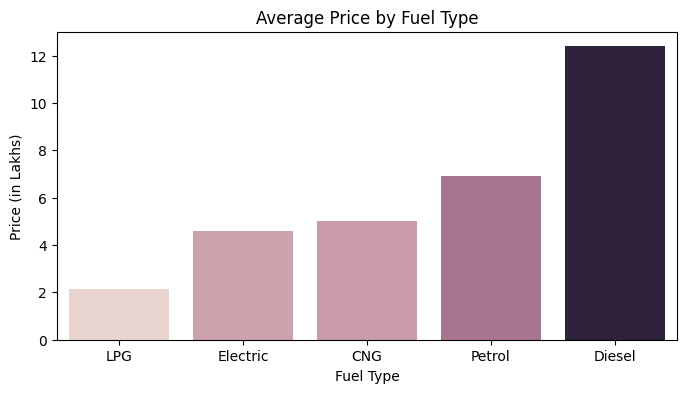

In [72]:
type = new_df.groupby("Fuel Type")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by Fuel Type')
plt.show()

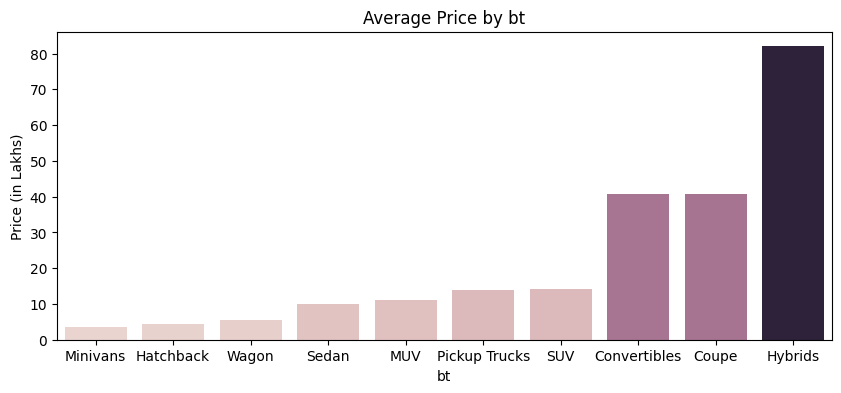

In [73]:
type = new_df.groupby("bt")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (10,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by bt')
plt.show()

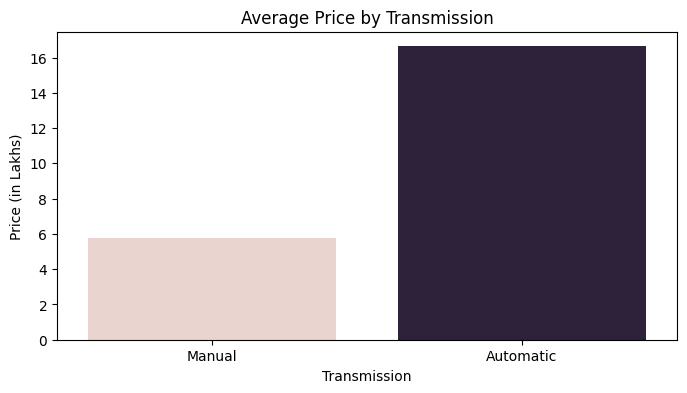

In [74]:
type = new_df.groupby("Transmission")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by Transmission')
plt.show()

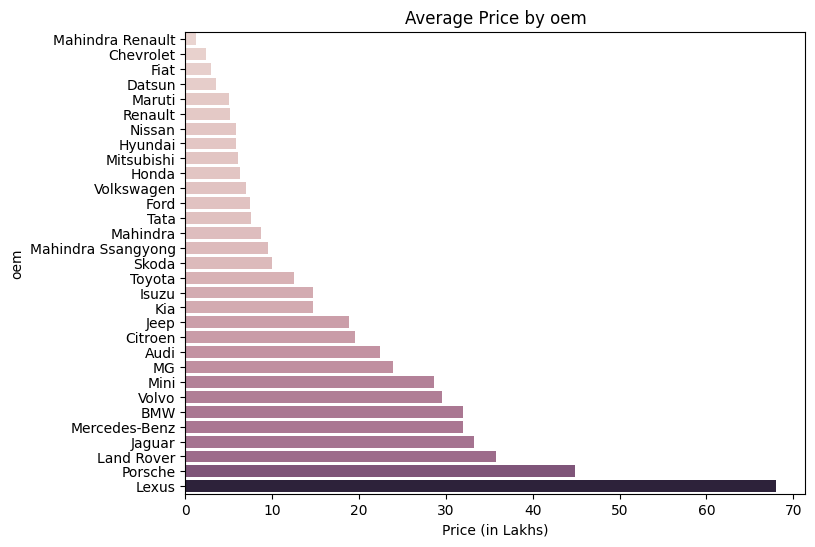

In [75]:
type = new_df.groupby("oem")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,6))
sns.barplot(y = type.index, x = type, hue = type, legend = False, orient ="h")
plt.xlabel("Price (in Lakhs)")
plt.title('Average Price by oem')
plt.show()

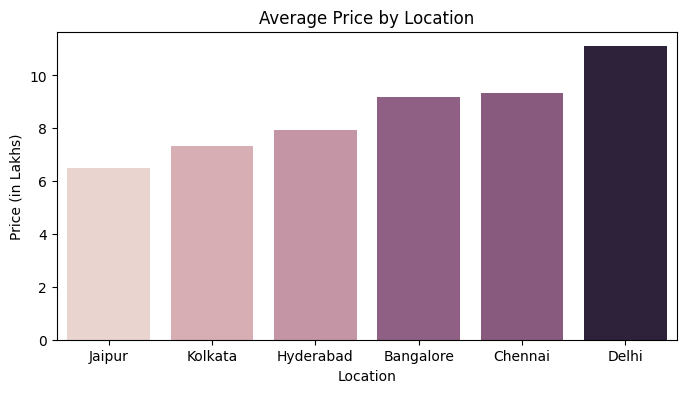

In [76]:
type = new_df.groupby("Location")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by Location')
plt.show()

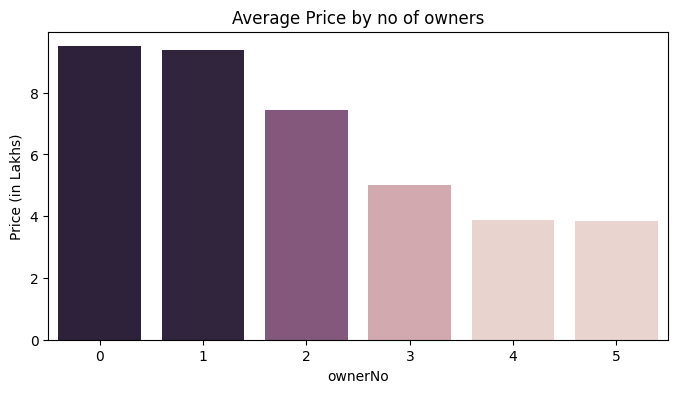

In [77]:
type = new_df.groupby("ownerNo")["price_num"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.ylabel("Price (in Lakhs)")
plt.title('Average Price by no of owners')
plt.show()

# label encoding for categorical features

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in new_df.select_dtypes("O").columns:
    new_df[i+"_encode"] = le.fit_transform(new_df[i])
    

In [79]:
new_df

,Location,Fuel Type,bt,km,Transmission,ownerNo,oem,model,modelYear,Displacement,...,Power_num,Location_encode,Fuel Type_encode,bt_encode,Transmission_encode,oem_encode,model_encode,Insurance Validity_encode,Color_encode,Engine Type_encode
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,998,...,67.04,0,4,2,1,19,140,5,129,264
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,1497,...,121.31,0,4,7,1,6,45,2,129,360
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,1199,...,84.00,0,4,2,1,27,238,2,105,322
3,Bangalore,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1197,...,81.86,0,4,8,1,8,79,2,83,291
4,Bangalore,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,1248,...,88.50,0,1,7,1,19,155,5,53,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Kolkata,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,2022,998,...,65.71,5,4,2,1,19,140,5,83,267
7709,Kolkata,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,2014,796,...,47.30,5,4,2,1,19,135,5,83,222
7710,Kolkata,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,1796,...,186.00,5,4,8,0,20,169,5,83,166
7711,Kolkata,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,2012,1197,...,85.80,5,4,2,1,19,152,5,83,260


In [80]:
new_df.columns

Index(['Location', 'Fuel Type', 'bt', 'km', 'Transmission', 'ownerNo', 'oem',
       'model', 'modelYear', 'Displacement', 'Insurance Validity',
       'No of Cylinder', 'Color', 'Values per Cylinder', 'Engine Type',
       'Seats', 'Mileage_num', 'Torque_num', 'price_num', 'Power_num',
       'Location_encode', 'Fuel Type_encode', 'bt_encode',
       'Transmission_encode', 'oem_encode', 'model_encode',
       'Insurance Validity_encode', 'Color_encode', 'Engine Type_encode'],
      dtype='object')

# Distribution of target variable(price_num)

<Axes: xlabel='price_num', ylabel='Count'>

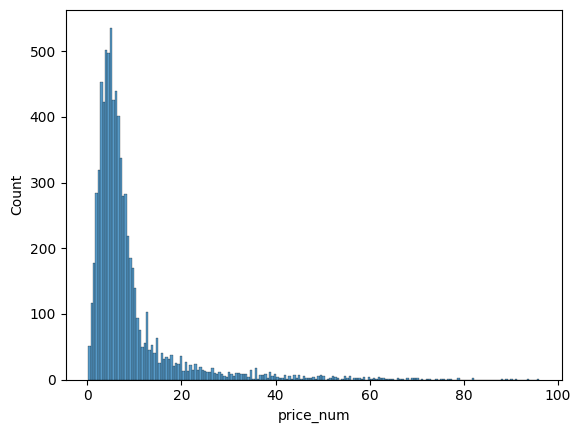

In [81]:
sns.histplot(new_df["price_num"])

<Axes: xlabel='price_num', ylabel='Count'>

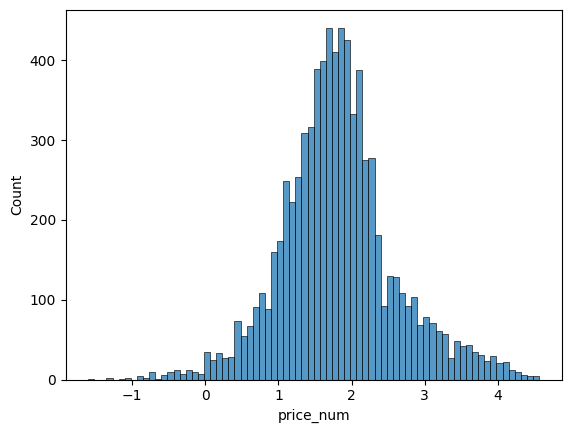

In [82]:
# after applying log transformation
new_df["price_num"] = new_df["price_num"].apply(lambda x: np.log(x))
sns.histplot(new_df["price_num"])

# correlation

In [83]:
cor = new_df.corr(numeric_only = True)
cor

,km,ownerNo,modelYear,Displacement,No of Cylinder,Values per Cylinder,Seats,Mileage_num,Torque_num,price_num,Power_num,Location_encode,Fuel Type_encode,bt_encode,Transmission_encode,oem_encode,model_encode,Insurance Validity_encode,Color_encode,Engine Type_encode
km,1.000000,0.108498,-0.232653,0.100419,0.080975,-0.021854,0.078514,-0.008120,0.065859,-0.091389,0.011336,-0.020549,-0.172013,0.044252,0.048319,0.017627,0.024533,0.039659,0.003150,0.052326
ownerNo,0.108498,1.000000,-0.373898,0.062282,0.037199,-0.038338,0.020166,-0.074638,-0.024176,-0.237654,-0.016097,-0.062699,-0.057571,-0.020026,0.033758,-0.035022,-0.026891,0.121094,0.033559,0.048663
modelYear,-0.232653,-0.373898,1.000000,-0.064213,-0.088716,0.087719,-0.013131,0.118457,0.110794,0.584804,0.105455,-0.008701,0.084043,0.072705,-0.167312,0.090430,0.076133,-0.099638,-0.024995,-0.149830
Displacement,0.100419,0.062282,-0.064213,1.000000,0.584060,-0.002275,0.460261,-0.579697,0.805290,0.582129,0.845372,-0.050832,-0.494220,0.506360,-0.371112,-0.047368,-0.006632,-0.051722,-0.044111,0.079981
No of Cylinder,0.080975,0.037199,-0.088716,0.584060,1.000000,0.352680,0.122013,-0.178814,0.465216,0.331420,0.531355,-0.061384,-0.256749,0.293487,-0.200376,-0.209018,-0.178282,-0.050125,-0.041585,0.146685
Values per Cylinder,-0.021854,-0.038338,0.087719,-0.002275,0.352680,1.000000,-0.023302,0.307535,0.034789,0.095667,0.048837,-0.022022,0.017006,0.004458,-0.060085,0.029057,0.028471,-0.015996,-0.022271,-0.011661
Seats,0.078514,0.020166,-0.013131,0.460261,0.122013,-0.023302,1.000000,-0.329588,0.304814,0.200396,0.198102,0.004693,-0.322513,0.112519,-0.003497,0.131003,0.128207,0.012850,-0.000029,0.004546
Mileage_num,-0.008120,-0.074638,0.118457,-0.579697,-0.178814,0.307535,-0.329588,1.000000,-0.364391,-0.312283,-0.555533,0.036772,-0.103354,-0.338786,0.269162,0.071890,0.027388,0.024567,0.032078,-0.038094
Torque_num,0.065859,-0.024176,0.110794,0.805290,0.465216,0.034789,0.304814,-0.364391,1.000000,0.694243,0.859637,-0.033706,-0.626490,0.491071,-0.430698,-0.063780,-0.030615,-0.070701,-0.046179,0.012707
price_num,-0.091389,-0.237654,0.584804,0.582129,0.331420,0.095667,0.200396,-0.312283,0.694243,1.000000,0.722027,-0.163536,-0.277709,0.440813,-0.511301,-0.033922,-0.010042,-0.153289,-0.046035,-0.041830


<Axes: >

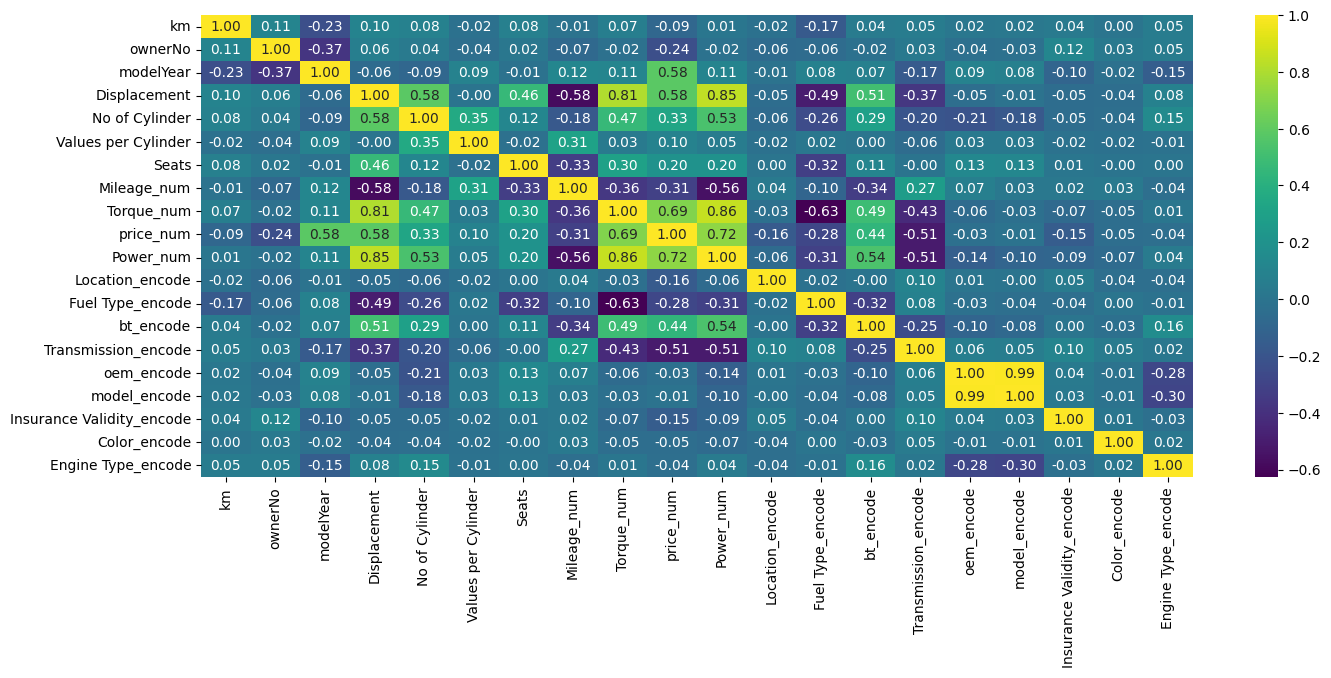

In [84]:
plt.figure(figsize = (16, 6))
sns.heatmap(cor, cmap = "viridis", fmt = ".2f", annot = True)

In [85]:
# by seeing the heatmap, we will drop the highly correlated columns which is greater than 0.8.

# Torque_num, Power_num, oem_encode are the three features that are highly correlated 

In [86]:
new_df.to_csv("Cleaned_car_dataset.csv", index = False, encoding = "utf-8-sig")

# **ML MODEL BUILDING**

using random forest regressor, we will train the model with all features and will select the top features which are contributing more for prediction.

In [87]:
# input(X)
X = new_df[['Location_encode', 'km', 'ownerNo', 'modelYear', 'Displacement', 'No of Cylinder', 'Values per Cylinder', 'Seats', 'Mileage_num', 'Fuel Type_encode', 'bt_encode',
            'Transmission_encode', 'model_encode', 'Insurance Validity_encode', 'Color_encode', 'Engine Type_encode']]
# output(Y)
Y = new_df['price_num']

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()  
rf.fit(X, Y)

pred_y_train = rf.predict(X)                                                    
                                                                                              
from sklearn.metrics import mean_squared_error
print("Train MSE:", mean_squared_error(Y, pred_y_train))        
                                                                                                         
from sklearn.metrics import r2_score                                                                        
print("Train r2_score:", r2_score(Y, pred_y_train))

Train MSE: 0.008172440543241732
Train r2_score: 0.9867866418164516


In [89]:
# feature importances (top 20)
fea_imp = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ["features", "importance"]).sort_values("importance", ascending = False)
fea_imp.iloc[0:20, :]

,features,importance
4,Displacement,0.383223
3,modelYear,0.365604
10,bt_encode,0.058565
11,Transmission_encode,0.042913
12,model_encode,0.028696
8,Mileage_num,0.024068
15,Engine Type_encode,0.023591
0,Location_encode,0.022055
1,km,0.020642
14,Color_encode,0.008149


In [90]:
# selecting those features which are greater than the threshold value of 0.01 
columns = fea_imp["features"][fea_imp["importance"] > 0.01].to_list()
columns

['Displacement',
 'modelYear',
 'bt_encode',
 'Transmission_encode',
 'model_encode',
 'Mileage_num',
 'Engine Type_encode',
 'Location_encode',
 'km']

In [91]:
# input
X = new_df[columns]
# output
Y = new_df["price_num"]

# XGBRegressor, RandomForestRegressor, GradientBoostingRegressor

In [92]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# train test split(train - 70% and test - 30%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state = 42)

# algorithms
algorithms = [XGBRegressor, RandomForestRegressor, 
              GradientBoostingRegressor]

for i in algorithms:
    model = i()
    model.fit(X_train, Y_train)

    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)

    print("Algorithm:", i.__name__)
    
    from sklearn.metrics import mean_squared_error
    print("Train MSE:", mean_squared_error(Y_train, pred_y_train),"----->", "Test MSE:", mean_squared_error(Y_test, pred_y_test))         

    from sklearn.metrics import r2_score
    print("Train r2_score:", r2_score(Y_train, pred_y_train),"-->", "Test r2_score:", r2_score(Y_test, pred_y_test))
    print("\n")

Algorithm: XGBRegressor
Train MSE: 0.008192456607537374 -----> Test MSE: 0.05149950993346599
Train r2_score: 0.9868934283693359 --> Test r2_score: 0.9145577529756309


Algorithm: RandomForestRegressor
Train MSE: 0.010033418362491001 -----> Test MSE: 0.058665400004977726
Train r2_score: 0.9839481949349088 --> Test r2_score: 0.9026689068403844


Algorithm: GradientBoostingRegressor
Train MSE: 0.05431444596061367 -----> Test MSE: 0.06961641208046417
Train r2_score: 0.9131058959887974 --> Test r2_score: 0.8845002081453988




xgboost model was the best model as it gives higher r2 score than the other models.

In [93]:
# hyperparameter tuning for xgboost model
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()

# Define the hyperparameter grid to search
param_grid = {
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': np.linspace(10, 30, 3, dtype = int),
            'min_child_weight': [1, 5, 9, 13]   
            }

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, Y_train)


# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print("\n")
print(f"Mean Squared Error on Test Set: {mse}")
print("\n")
print(f"r2 score on Test Set: {r2}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 30, 'min_child_weight': 13}


Mean Squared Error on Test Set: 0.055213130090125975


r2 score on Test Set: 0.9083965283117468


# Saving the best model ( xgboost model)

In [94]:
with open("used_car_prediction_model.pkl", "wb") as file:
    pickle.dump(best_model, file)